# Generative Model

## Preview
___

## Index
___


1.   항목 추가

1.   항목 추가
2.   항목 추가


2.   항목 추가



## Preface
___

<font size=12>__GAN__</font>  
_Generative Adversarial Network_

_https://openai.com/blog/generative-models/_  
_https://www.tensorflow.org/tutorials/generative/dcgan?hl=ko_  
_https://towardsdatascience.com/what-is-transposed-convolutional-layer-40e5e6e31c11_

## Set up

In [ ]:
import tensorflow as tf

tf.__version__

'2.8.2'

In [ ]:
!python --version

Python 3.7.13


### Import Module
___

In [ ]:
import os
import sys
import pickle
import random

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

In [ ]:
import glob
import time

import PIL
import imageio

from tensorflow.keras import layers
from IPython import display

### Configuration
___

In [ ]:
random_seed = 71

random.seed(random_seed)
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

In [ ]:
mpl.rcParams['figure.figsize'] = (10, 10)
mpl.rcParams['xtick.labelbottom'] = False
mpl.rcParams['ytick.labelleft'] = False
mpl.rcParams['axes.grid'] = False

## 진행
___

### DataSet

_https://github.com/zalandoresearch/fashion-mnist_

In [ ]:
%%capture
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_x, _), (test_x, _) = fashion_mnist.load_data()

In [ ]:
type(train_x)

numpy.ndarray

In [ ]:
train_x.dtype

dtype('uint8')

In [ ]:
train_x.shape

(60000, 28, 28)

In [ ]:
train_x = (train_x - 127.5) / 127.5 # 이미지를 [-1, 1]로 정규화합니다.

print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 1.0
min pixel: -1.0


In [ ]:
train_x = train_x.reshape(*train_x.shape, 1).astype('float32')
train_x.shape

(60000, 28, 28, 1)

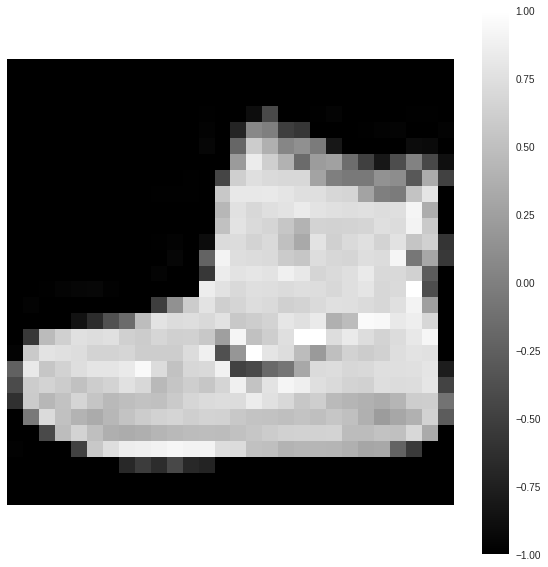

In [ ]:
# No label
plt.imshow(train_x[0].reshape(28, 28), cmap='gray')
plt.colorbar()
plt.show()

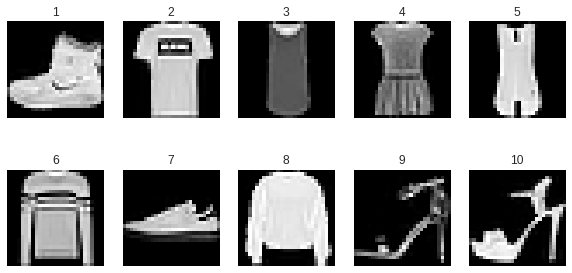

In [ ]:
plt.figure(figsize=(10, 5))

for i in range(1, 10+1):
    plt.subplot(2, 5, i)
    plt.imshow(train_x[i-1].reshape(28, 28), cmap='gray')
    plt.title(i)
plt.show()

In [ ]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle
train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [ ]:
def make_generator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Dense layer
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Second: Reshape layer
    model.add(layers.Reshape((7, 7, 256)))

    # Third: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(128, kernel_size=(5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fourth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(64, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fifth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(1, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False, \
                                     activation='tanh'))

    return model

In [ ]:
generator = make_generator_model()

generator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 12544)             1254400   
                                                                 
 batch_normalization_3 (Batc  (None, 12544)            50176     
 hNormalization)                                                 
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 12544)             0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 7, 7, 128)        819200    
 ranspose)                                                       
                                                                 
 batch_normalization_4 (Batc  (None, 7, 7, 128)       

In [ ]:
noise = tf.random.normal([1, 100])

print(noise.shape)
print(tf.rank(noise))
type(noise)

(1, 100)
tf.Tensor(2, shape=(), dtype=int32)


tensorflow.python.framework.ops.EagerTensor

In [ ]:
generated_image = generator(noise, training=False)

print(generated_image.shape)
print(tf.rank(generated_image))

(1, 28, 28, 1)
tf.Tensor(4, shape=(), dtype=int32)


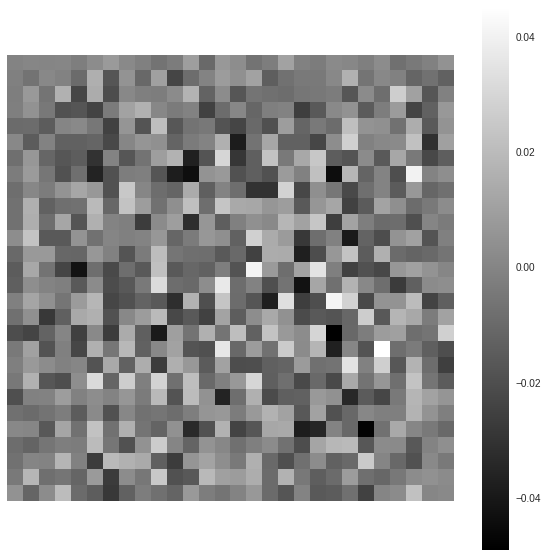

In [ ]:
plt.imshow(generated_image[0, :, :, 0], cmap='gray')
plt.colorbar()
plt.show()

In [ ]:
(generated_image[0, :, :, 0].shape